<a href="https://colab.research.google.com/github/Faseeh56/Data-Cleaning/blob/main/Data_Cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd

In [87]:
df = pd.read_csv("/content/drive/MyDrive/CSV's/marketing_campaign_data_messy.csv")
print(f"loaded dataset: {df.shape[0]}:rows, {df.shape[1]}:columns")

loaded dataset: 2020:rows, 12:columns


In [88]:
df

,Campaign_ID,Campaign_Name,Start_Date,End_Date,Channel,Impressions,Clicks,Spend,Conversions,Active,Clicks,Campaign_Tag
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24 00:00:00,2023-12-13,TikTok,16795,197,$102.82,20.0,Y,NaN,TI
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06 00:00:00,2023-05-12,Facebook,1860,30,24.33,1.0,0,NaN,FA
2,CMP-00003,Q3_Winter_CMP-00003,2023-12-13 00:00:00,2023-12-20,Email,77820,843,1323.39,51.0,No,NaN,EM
3,CMP-00004,Q1_BlackFriday_CMP-00004,2023-10-30,2023-11-03,TikTok,55886,2019,2180.38,135.0,True,NaN,TI
4,CMP-00005,Q2_Winter_CMP-00005,2023-04-22 00:00:00,2023-04-23,Facebook,7265,169,252.44,30.0,Yes,NaN,FA
...,...,...,...,...,...,...,...,...,...,...,...,...
2015,CMP-00400,Q3_Summer_CMP-00400,2023-10-31 00:00:00,2023-11-13,TikTok,30592,586,$503.95,77.0,1,NaN,TI
2016,CMP-01255,Q4_Summer_CMP-01255,2023-09-01 00:00:00,2023-09-26,Google Ads,20097,897,1641.0,162.0,0,NaN,GO
2017,CMP-01050,Q2_Launch_CMP-01050,2023-02-09 00:00:00,2023-02-21,Instagram,33254,1117,883.82,214.0,0,NaN,IN
2018,CMP-01118,Q4_Winter_CMP-01118,2023-03-30 00:00:00,2023-04-27,Facebook,68728,2960,4198.5,591.0,Yes,NaN,FA


In [89]:
# ============================================
# Step 1: Header cleaning
# ============================================

print(df.columns.tolist())
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Fix applied")
print(df.columns.tolist())

[' Campaign_ID ', 'Campaign_Name', 'Start_Date', 'End_Date', 'Channel', 'Impressions', 'Clicks ', 'Spend', 'Conversions', 'Active', 'Clicks', 'Campaign_Tag']
Fix applied
['campaign_id', 'campaign_name', 'start_date', 'end_date', 'channel', 'impressions', 'clicks', 'spend', 'conversions', 'active', 'clicks', 'campaign_tag']


In [90]:
# ============================================
# Step 2: Types conversion & currency cleaning
# ============================================

dirty_spend_mask = df['spend'].astype(str).str.contains(r'\$')
print(df.loc[dirty_spend_mask, ['campaign_id','spend']].head(3))

df['spend'] = df['spend'].astype(str).str.replace(r'[^\d.-]','',regex = True)
df['spend'] = pd.to_numeric(df['spend'])
print('Fix applied')
print(df.loc[dirty_spend_mask, ['campaign_id','spend']].head(3))

   campaign_id     spend
0    CMP-00001   $102.82
21   CMP-00022   $2428.4
22   CMP-00023  $4726.22
Fix applied
   campaign_id    spend
0    CMP-00001   102.82
21   CMP-00022  2428.40
22   CMP-00023  4726.22


In [91]:
# ============================================
# Step 3: Categorical typos (fuzzy logic)
# ============================================

'''making the categorical values unique so
that data should look fine and easy to handel'''

print(df['channel'].unique())
cleanup_map = {
    'Tik_Tok' : 'TikTok',
    'Facebok' : 'Facebook',
    'Insta_gram' : 'Instagram',
    'Gogle' : 'Google Ads',
    'E-mail' : 'Email',
    'N/A' : np.nan
}

df['channel'] = df['channel'].replace(cleanup_map)
print('Fix applied')
print(df['channel'].unique())

['TikTok' 'Facebook' 'Email' 'Instagram' 'Google Ads' 'E-mail' nan 'Gogle'
 'Tik_Tok' 'Facebok' 'Insta_gram']
Fix applied
['TikTok' 'Facebook' 'Email' 'Instagram' 'Google Ads' nan]


In [92]:
# ============================================
# Step 4: Handling mixed boleans
# ============================================

# making the boolean data in standard boolean form

print(df['active'].unique())
bol_map = {
    1: True,
    0: False,
    'True' : True,
    'Y' : True,
    'Yes' :True,
    '1' :True,
    'False' : False,
    'No' : False,
    '0' : False,
}

df['active'] = df['active'].replace(bol_map).fillna(False).astype(bool)
print('Fix applied')
print(df['active'].unique())


['Y' '0' 'No' 'True' 'Yes' '1' 'False']
Fix applied
[ True False]


/tmp/ipython-input-40705371.py:20: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['active'] = df['active'].replace(bol_map).fillna(False).astype(bool)


In [93]:
# ============================================
# Step 5: Date Phrasing
# ============================================

''' the datetime columns have object datatype,
converting these datatypes to datatime datatype'''

df['start_date'] = pd.to_datetime(df['start_date'], errors='coerce')
df['end_date'] = pd.to_datetime(df['end_date'], errors= 'coerce')
print('Fix applied')
print((f"Start date: {df['start_date'].dtype}"))
print((f"End date: {df['end_date'].dtype}"))



Fix applied
Start date: datetime64[ns]
End date: datetime64[ns]


In [94]:
# CLicks columns is duplicated, to remove dupkicated columns:
df = df.loc[:,~df.columns.duplicated()]

In [95]:
df

,campaign_id,campaign_name,start_date,end_date,channel,impressions,clicks,spend,conversions,active,campaign_tag
0,CMP-00001,Q4_Summer_CMP-00001,2023-11-24,2023-12-13,TikTok,16795,197,102.82,20.0,True,TI
1,CMP-00002,Q1_Launch_CMP-00002,2023-05-06,2023-05-12,Facebook,1860,30,24.33,1.0,False,FA
2,CMP-00003,Q3_Winter_CMP-00003,2023-12-13,2023-12-20,Email,77820,843,1323.39,51.0,False,EM
3,CMP-00004,Q1_BlackFriday_CMP-00004,NaT,2023-11-03,TikTok,55886,2019,2180.38,135.0,True,TI
4,CMP-00005,Q2_Winter_CMP-00005,2023-04-22,2023-04-23,Facebook,7265,169,252.44,30.0,True,FA
...,...,...,...,...,...,...,...,...,...,...,...
2015,CMP-00400,Q3_Summer_CMP-00400,2023-10-31,2023-11-13,TikTok,30592,586,503.95,77.0,True,TI
2016,CMP-01255,Q4_Summer_CMP-01255,2023-09-01,2023-09-26,Google Ads,20097,897,1641.00,162.0,False,GO
2017,CMP-01050,Q2_Launch_CMP-01050,2023-02-09,2023-02-21,Instagram,33254,1117,883.82,214.0,False,IN
2018,CMP-01118,Q4_Winter_CMP-01118,2023-03-30,2023-04-27,Facebook,68728,2960,4198.50,591.0,True,FA


In [96]:
# ============================================
# Step 6: Logical integrity(clicks vs impressions)
# ============================================

''' Cheacking weather clicks are less than impressions or not, because clicks
are always less than impressions as impressions is the occurance of that particular
content to the user and then its upto the user weather he/she clicks that impression
or not'''

impossible_mask = df['clicks'] > df['impressions']
print(df.loc[impossible_mask, ['campaign_id','clicks','impressions']].head(3))

Empty DataFrame
Columns: [campaign_id, clicks, impressions]
Index: []


In [97]:
# ============================================
# Step 7: Logical integrity(Time Travel)
# ============================================

time_travel_mask = df['end_date'] < df['start_date']
print(df.loc[time_travel_mask, ['campaign_id','start_date','end_date']].head(3))

df.loc[time_travel_mask,'end_date'] = df.loc[time_travel_mask,'start_date'] + pd.Timedelta(days =30)
print('Fix applied')
print(df.loc[time_travel_mask, ['campaign_id','start_date','end_date']].head(3))


   campaign_id start_date   end_date
23   CMP-00024 2023-05-06 2023-05-01
54   CMP-00055 2023-09-01 2023-08-27
71   CMP-00072 2023-02-01 2023-01-27
Fix applied
   campaign_id start_date   end_date
23   CMP-00024 2023-05-06 2023-06-05
54   CMP-00055 2023-09-01 2023-10-01
71   CMP-00072 2023-02-01 2023-03-03


In [113]:
# ============================================
# Step 8: Handeling outliers (winsorizing)
# ============================================

'''This code block focuses on handling outliers in
the spend column using a technique called winsorizing,
based on the Interquartile Range (IQR). It first calculates
the first quartile (Q1), third quartile (Q3), and the
IQR itself. Then, it defines an upper_limit for outliers
by adding three times the IQR to Q3. Any spend values
above this upper_limit are considered outliers and are
then capped at the upper_limit to reduce their extreme
influence on the data. '''

Q1 = df['spend'].quantile(0.25)
Q3 = df['spend'].quantile(0.75)
IQR = Q3 - Q1
print(f"Q1: {Q1}\nQ3: {Q3}\nIQR: {IQR}")

upper_limit = Q3 + (3 * IQR)
print(f"Upper limit: {upper_limit}")

oulier_mask = df['spend'] > upper_limit
print(df.loc[oulier_mask, ['campaign_id','spend']].head(3))

print('Fix applied')
df.loc[oulier_mask, ' spend'] = upper_limit
print(df.loc[oulier_mask, ['campaign_id','spend']].head(3))



Q1: 649.9975
Q3: 2638.3824999999997
IQR: 1988.3849999999998
Upper limit: 8603.537499999999
Empty DataFrame
Columns: [campaign_id, spend]
Index: []
Fix applied
Empty DataFrame
Columns: [campaign_id, spend]
Index: []


## **Output of 1st time when this code run**

Q1 = df['spend'].quantile(0.25)
Q3 = df['spend'].quantile(0.75)

IQR = Q3 - Q1
upper_limit = Q3 + (3 * IQR)

outlier_mask = df['spend'] > upper_limit
print(df.loc[outlier_mask,['campaign_id','spend']].head(3))

print("FIX APPLIED")
df.loc[outlier_mask, 'spend'] = upper_limit
print(df.loc[outlier_mask,['campaign_id','spend']].head(3))


---

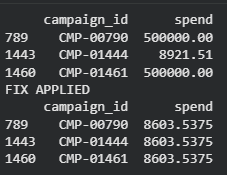

In [119]:
# ============================================
# Step 9: String prasing (feature extraction)
# ============================================

print(df['campaign_name'].head(3))

df['season'] = df['campaign_name'].str.extract(r'Q\d_([^_]+)_')
print("Fix applied")
print(df[['campaign_name','season']].head(3))

0    Q4_Summer_CMP-00001
1    Q1_Launch_CMP-00002
2    Q3_Winter_CMP-00003
Name: campaign_name, dtype: object
Fix applied
         campaign_name  season
0  Q4_Summer_CMP-00001  Summer
1  Q1_Launch_CMP-00002  Launch
2  Q3_Winter_CMP-00003  Winter
